## Linear Regression using scikit-learn library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

### Loading the Boston housing dataset

In [3]:
boston = datasets.load_boston() # Predicting House prices
X = boston.data
y = boston.target

In [4]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


### Subplots of all 13 Input features Vs Target Variable

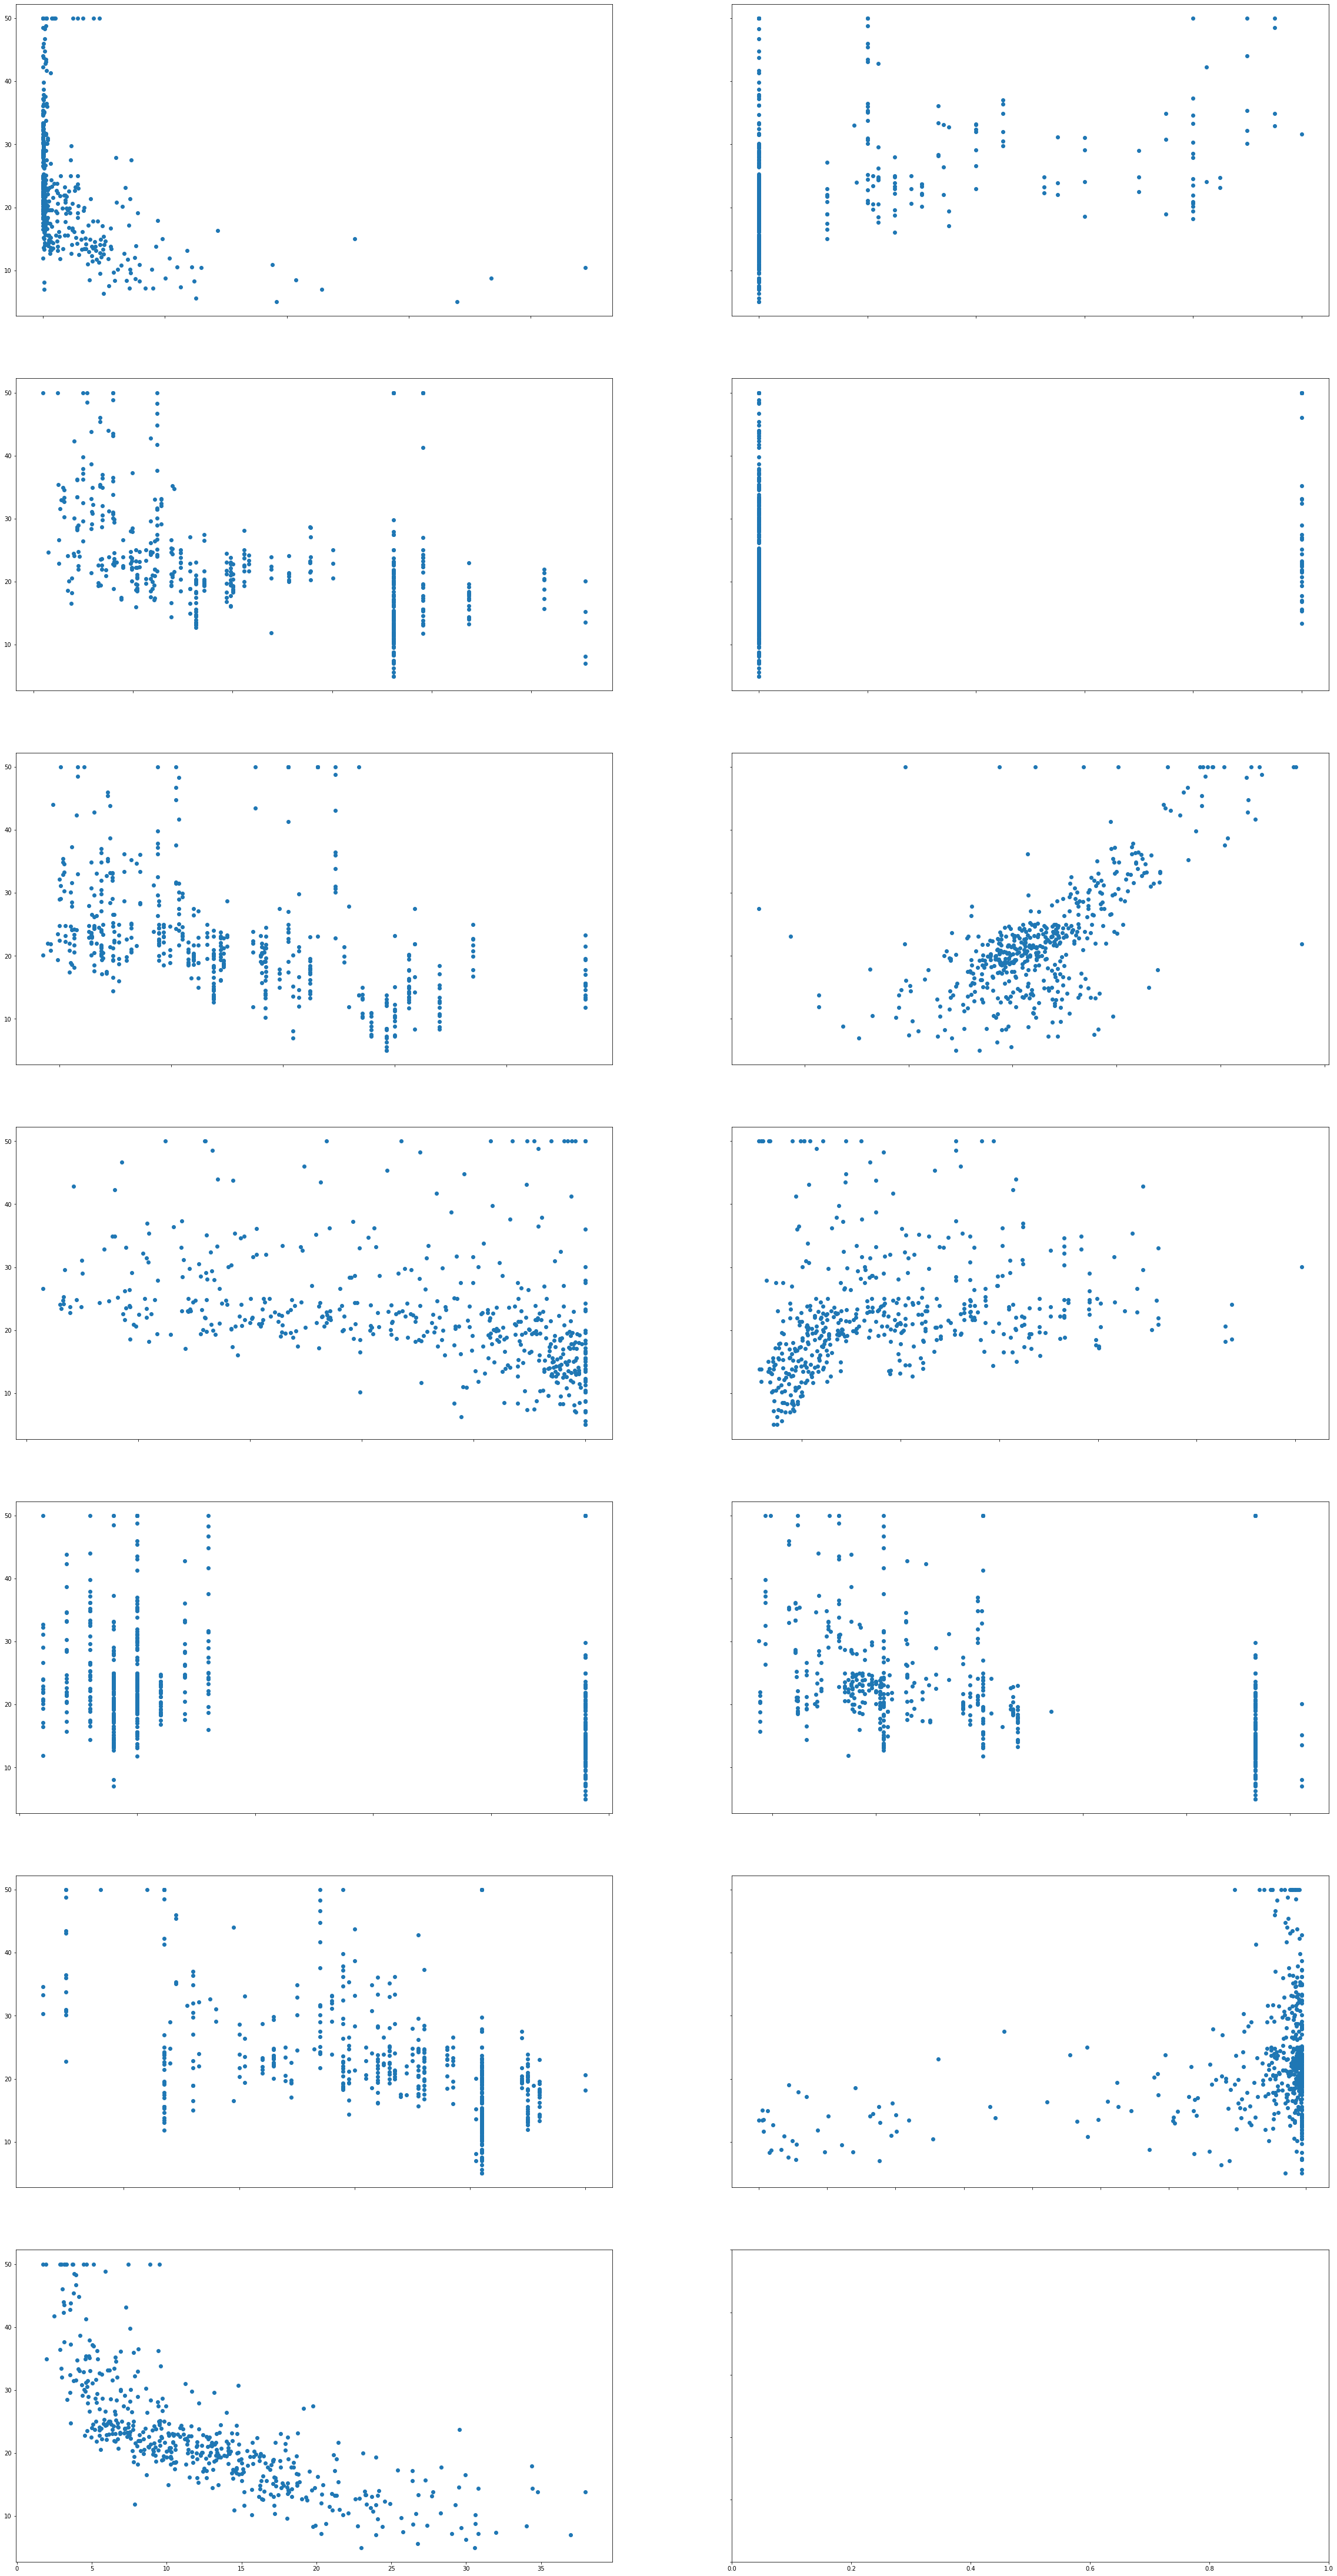

In [5]:
fig, axs = plt.subplots(7, 2,figsize=(40,80))

axs[0, 0].scatter(X[:,0], y)
axs[0, 1].scatter(X[:,1], y)
axs[1, 0].scatter(X[:,2], y)
axs[1, 1].scatter(X[:,3], y)
axs[2, 0].scatter(X[:,4], y)
axs[2, 1].scatter(X[:,5], y)
axs[3, 0].scatter(X[:,6], y)
axs[3, 1].scatter(X[:,7], y)
axs[4, 0].scatter(X[:,8], y)
axs[4, 1].scatter(X[:,9], y)
axs[5, 0].scatter(X[:,10], y)
axs[5, 1].scatter(X[:,11], y)
axs[6, 0].scatter(X[:,12], y)

for ax in axs.flat:
    ax.label_outer()

In [6]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state =2)
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((404, 13), (102, 13), (404,), (102,))

In [7]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest  = scaler.fit_transform(Xtest)

In [8]:
l_reg = LinearRegression()

model = l_reg.fit(Xtrain,ytrain)
preds = model.predict(Xtest)

In [9]:
# The parameters in our hypothesis equation
print('Coefficient: ',model.coef_) 
print('Intercept: ',model.intercept_)

Coefficient:  [-0.93451207  0.85487686 -0.10446819  0.81541757 -1.90731862  2.54650028
  0.25941464 -2.92654009  2.80505451 -1.95699832 -2.15881929  1.09153332
 -3.91941941]
Intercept:  22.44133663366339


In [10]:
print('R^2 value: ',r2_score(ytest,preds))
print('MSE value: ',mean_squared_error(ytest,preds))

R^2 value:  0.7730936369154335
MSE value:  18.98291414610641


In [11]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': preds.flatten()})
df.sample(10)

Actual  Predicted
59    22.4  22.862188
85    36.0  35.507029
99    14.3  13.810742
88    24.8  28.926123
32    31.1  29.957452
12    22.0  20.238520
76    19.1  23.363359
51    30.7  30.255211
96    46.7  34.129180
11    24.8  25.089141

References
* [Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)